In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa.display
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, load_model


from Code.Misc.helper import *
from Code.Misc.features import *
%matplotlib inline


Using TensorFlow backend.


In [2]:
# load in model

PATH_TO_MODEL = "../Misc/Saved_data/Trained_models/2_layer_LSTM.pickle"
model = load_model(PATH_TO_MODEL)

In [3]:
# read in wav file

In [4]:
import IPython.display as ipd
audio_path = "F:\Capstone Project\Capstone---RTSD-System\Data\CMU_MOSI\Raw\Audio\WAV_16000/Full/"
file_name = "0h-zjBukYpk.wav"

#ipd.Audio(audio_path + file_name) # load a local WAV file

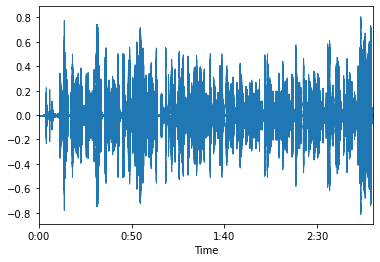

In [5]:
import librosa

y, sr = librosa.load(audio_path + file_name) #, duration=10)
fig, ax = plt.subplots()
librosa.display.waveplot(y, sr=sr)
ax.label_outer()

In [6]:
wav = get_audio(audio_path, file_name)
(nchannels, sampwidth, framerate, nframes, comptype, compname), samples_wav = wav

In [7]:
import speech_recognition as sr
r = sr.Recognizer()
r.energy_threshold = 280

a_file = sr.AudioFile(audio_path + file_name)

In [15]:
input_audio_file = sr.AudioFile(audio_path + file_name)

audio_list = []
length = 5
overlap = 0.4
with input_audio_file as source:
    dur = source.DURATION
    r.adjust_for_ambient_noise(source, duration=1)

for sample in range(0, int(dur / length)):
    if sample > 0:
        ptime_offset = sample * length - overlap
    else:
        ptime_offset = 0

    #print("sample: " + str(ptime_offset) + " - " + str(ptime_offset + length))
    with input_audio_file as source:
        #r.adjust_for_ambient_noise(source, duration=0.5)
        audio_list.append(r.record(source, duration=length , offset = ptime_offset))


In [ ]:
i = 0
avg_time = 0
for sample in audio_list:
    if i > 0:
        ptime_offset = i * length - overlap
    else:
        ptime_offset = 0

    print("frame: " + str(ptime_offset) + " - " + str(ptime_offset + length))
    i += 1
    print("GOOGLE:")
    try:
        time_start = time.time()
        print("\t" + str(r.recognize_google(sample)))
    except:
        print("\t--- Skip ---")

    time_sr = time.time() - time_start
    print("\t" + str(round(time_sr, 2)) + " seconds")
    avg_time += time_sr

print("________________ \n" +
      "Average Time: " + str(round(avg_time/i, 2)))



frame: 0 - 5
GOOGLE:
	--- Skip ---
	0.42 seconds
frame: 4.6 - 9.6
GOOGLE:
	--- Skip ---
	0.72 seconds
frame: 9.6 - 14.6
GOOGLE:
	--- Skip ---
	1.46 seconds
frame: 14.6 - 19.6
GOOGLE:
	Wolverine
	2.25 seconds
frame: 19.6 - 24.6
GOOGLE:
	Danny Huston Ryan Reynolds William
	2.19 seconds
frame: 24.6 - 29.6
GOOGLE:
	and yes I just watched this a week ago
	1.5 seconds
frame: 29.6 - 34.6
GOOGLE:
	--- Skip ---
	0.78 seconds
frame: 34.6 - 39.6
GOOGLE:
	--- Skip ---
	0.99 seconds
frame: 39.6 - 44.6
GOOGLE:
	backstory of X-Men member
	1.77 seconds
frame: 44.6 - 49.6
GOOGLE:
	I'm not going to sugarcoat this movies
	1.72 seconds
frame: 49.6 - 54.6
GOOGLE:
	--- Skip ---
	2.15 seconds
frame: 54.6 - 59.6
GOOGLE:
	my reason I'm a comic book
	1.23 seconds
frame: 59.6 - 64.6
GOOGLE:
	DC comic book character created responsibly
	1.17 seconds
frame: 64.6 - 69.6
GOOGLE:
	--- Skip ---
	0.89 seconds
frame: 69.6 - 74.6
GOOGLE:
	with that I must say that this had a surprisingly.
	1.43 seconds
frame: 74.6 - 79.6

In [10]:
with input_audio_file as source:
        audio = r.record(source, offset=30)#, duration=60)
        #audio = r.record(source, duration=60)
        #audio = r.record(source, duration=60)
       # audio = r.record(source, duration=60)
        #audio2 = r.record(source, duration=60)

result = r.recognize_google(audio)

